In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

Found 1651 files belonging to 4 classes.


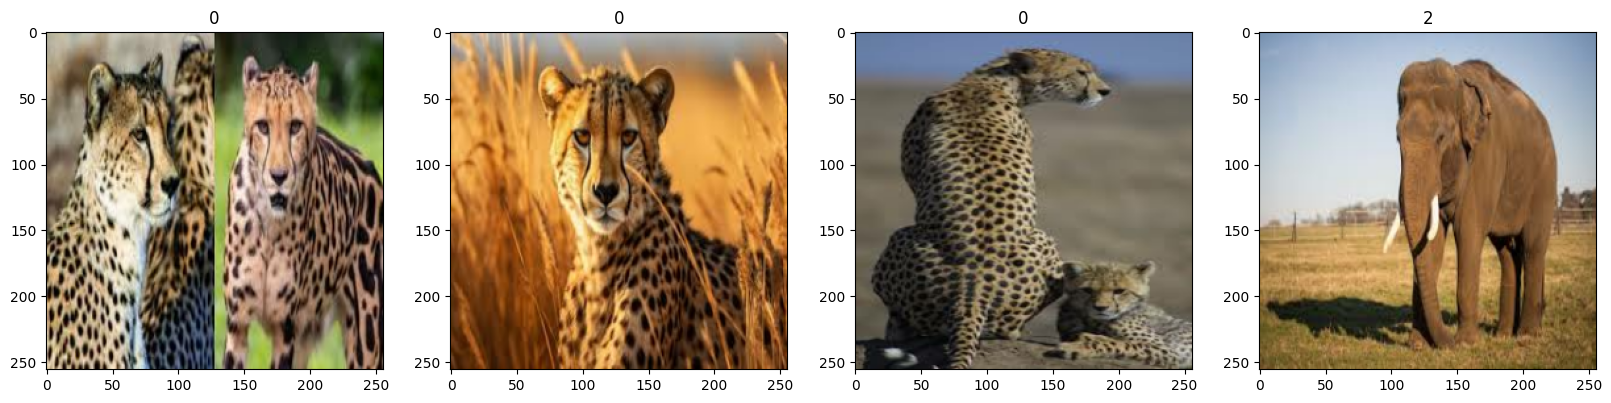

In [10]:
data = image_dataset_from_directory(
    r'C:\Users\Saurabh\Desktop\summer work\LS_ML\dataforweek3',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)



# Create a numpy iterator for data
data_iterator = data.as_numpy_iterator()

# Get a batch from the iterator
batch = data_iterator.next()

# Visualize the labels given to different animals
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [11]:
data = data.map(lambda x, y: (x / 255.0, y))


In [12]:
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = int(0.1 * len(data))

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes: elephants, tigers, cheetahs, and crocodiles
])


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.2645 - loss: 2.7768 - val_accuracy: 0.3313 - val_loss: 1.3529
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4150 - loss: 1.3041 - val_accuracy: 0.5688 - val_loss: 1.0840
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5497 - loss: 1.0660 - val_accuracy: 0.6250 - val_loss: 0.9692
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6953 - loss: 0.7926 - val_accuracy: 0.6562 - val_loss: 0.8459
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8054 - loss: 0.5157 - val_accuracy: 0.7188 - val_loss: 0.7467
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8694 - loss: 0.3750 - val_accuracy: 0.8625 - val_loss: 0.5310
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9327 - loss: 0.2142 - val_accuracy: 0.8625 - val_loss: 0.4562
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9534 - loss: 0.1498 - val_accuracy: 0.8938 - val_loss:

In [16]:
loss, accuracy = model.evaluate(test_data)
if accuracy >= 0.85:
    print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
    print(f"Try again, not enough accuracy! Your accuracy is {accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8278 - loss: 1.1220
Congratulations, CNN assignment complete!! Your accuracy is 0.8547486066818237
